# Competição Kaggle - Titanic

## 1° Passo - Limpeza dos dados


In [1]:
# Adicionando bibliotecas necessarias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lendo datasets
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
# Apresentação basica de train
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Apresentação basica de test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Excluindo colunas desnecessárias

In [5]:
#Obs: axis = 1, serve para remover a coluna inteira e não apenas uma linha
#Obs: inplace = True, serve para indicar q a alteração será no próprio banco
train.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

### Convertendo palavras em números

In [6]:
new_train = pd.get_dummies(train)
new_test = pd.get_dummies(test)

In [7]:
new_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


### Retirar os valores nulos
    Solução encontrada: Colocar no lugar os valores nulos a média daquela coluna.

In [8]:
#Verificando quantos valores nulos tem em cada coluna
new_train.isnull().sum().sort_values(ascending=False).head()

Age           177
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
dtype: int64

In [9]:
new_test.isnull().sum().sort_values(ascending=False).head()

Age           86
Fare           1
Embarked_S     0
Embarked_Q     0
Embarked_C     0
dtype: int64

In [10]:
#Colocando nos campos nulos a média das idades dos passageiros
new_train['Age'].fillna(new_train['Age'].mean(),inplace=True)
new_test['Age'].fillna(new_test['Age'].mean(),inplace=True)
#Colocando nos campos nulos a média do preço das passagens
new_test['Fare'].fillna(new_test['Fare'].mean(),inplace=True)

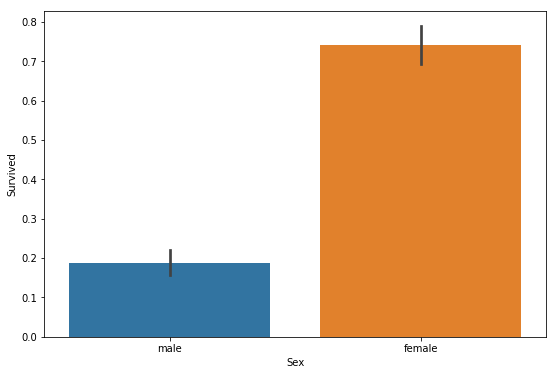

In [11]:
plt.figure(figsize=(9,6))
sns.barplot(x='Sex',y='Survived',data=train)

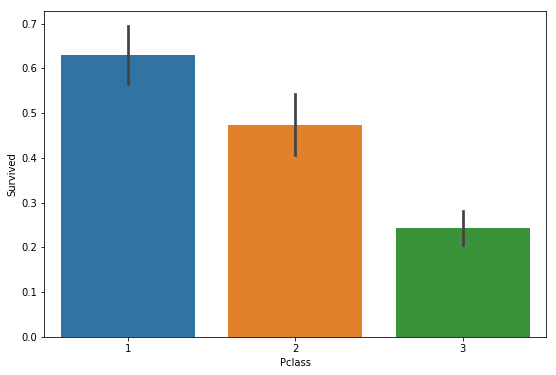

In [12]:
plt.figure(figsize=(9,6))
sns.barplot(x='Pclass', y='Survived', data=train)


## 2° Passo: Construindo modelo

### Escolhendo os recursos

In [13]:
X = new_train.drop('Survived',axis=1)
recursos = new_train.columns.values
y = new_train['Survived']

### Definindo o modelo

In [14]:
modelo = KNeighborsClassifier()
modelo.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
parametros = {
            "n_neighbors": [1,5,8,10],
            "algorithm": ['auto','ball_tree','kd_tree','brute'],
            "leaf_size": [20,30,50]
}
grid_search = GridSearchCV(modelo, parametros)
grid_search.fit(X,y)
modelo = grid_search.best_estimator_
print(grid_search.best_params_, grid_search.best_score_)
modelo.fit(X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5} 0.5667789001122334


KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Verificando a importancia das colunas selecionadas

### Verificando o nivel de precisão do modelo

In [16]:
print(modelo.score(X,y))
predicao = modelo.predict(new_test)

0.7542087542087542


## Enviando as previsões

### Criando banco de acordo com o solicitado

In [17]:
submission = pd.DataFrame()
submission['PassengerId'] = new_test['PassengerId']
submission['Survived'] = predicao
#Convertendo para CSV e sem o index pois não pede
submission.to_csv('submission.csv',index=False)

### Validação do modelo

In [18]:
# Validando modelo usando Cross Validation
modelo_val = cross_val_score(modelo, X, y,scoring='accuracy', cv=5)
print(modelo_val.mean())

0.5422532623918048
